# Ulike Selskaper (Sammenlikning)

## Imports osv

In [2]:
# Installing packages
!pip install webdriver-manager plotnine selenium hdbscan beautifulsoup4 keybert pycryptodome sentence-transformers PyPDF2 --quiet

# Importing the transformer
from sentence_transformers import SentenceTransformer

# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import scipy as sc
import requests
import torch
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
from sklearn.manifold import TSNE
from keybert import KeyBERT
from sklearn.decomposition import PCA   

# Special imports for plots
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression

# Imports for the widgets
from ipywidgets import widgets, interact
from IPython.display import display, clear_output

#Imports for decrypting urls to pdfs or html
from urllib.parse import urljoin
import re
import requests
import PyPDF2
from bs4 import BeautifulSoup
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

DEPRECATION: Loading egg at /opt/anaconda3/envs/embed/lib/python3.12/site-packages/sacremoses-0.0.43-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


/opt/anaconda3/envs/embed/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## Selskapene

In [3]:
def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

In [4]:
def snitt2(embeddings):
    tensor_embeddings = [torch.tensor(emb) for emb in embeddings]
    snitt2 = torch.stack(tensor_embeddings).mean(dim=0)
    return snitt2

### ExxonMobil (ferdig)

In [5]:
## Nyheter

with open('data/Exxon_news_embeddings.pkl', 'rb') as file:
    exxon_news = pickle.load(file)

exxon_news = snitt(exxon_news)
print(f"Exxon ({len(exxon_news)}): {exxon_news}")  ## 2016-2024

Exxon (9): [array([-0.24312055,  0.5051784 ,  0.1549819 , ..., -0.6929625 ,
       -0.24416393,  0.20473239], dtype=float32), array([-0.29078484,  0.5914777 ,  0.13950814, ..., -0.7001572 ,
       -0.25072357,  0.20023325], dtype=float32), array([-0.20187528,  0.6276899 ,  0.10301138, ..., -0.74484354,
       -0.26047188,  0.18062863], dtype=float32), array([-0.24780482,  0.5994666 ,  0.07525771, ..., -0.7720047 ,
       -0.2908926 ,  0.16564277], dtype=float32), array([-0.22474691,  0.5233269 , -0.01631049, ..., -0.7311823 ,
       -0.29212835,  0.04337287], dtype=float32), array([-0.23074628,  0.52626956,  0.08668005, ..., -0.7644288 ,
       -0.36406428,  0.02450266], dtype=float32), array([-0.26597995,  0.5513826 ,  0.03799932, ..., -0.81161195,
       -0.4229434 ,  0.01807259], dtype=float32), array([-0.29241958,  0.46201125,  0.14774753, ..., -0.61416876,
       -0.35401216,  0.04904832], dtype=float32), array([-0.24218343,  0.52749103,  0.07972469, ..., -0.6482674 ,
       -0.38

In [6]:
## Årsrapporter

with open("data/Exxon_pdfs.pkl", "rb") as file:
    exxon_annual = pickle.load(file)

exxon_annual = snitt(list(exxon_annual.values()))
print(f"Exxon pdfs ({len(exxon_annual)}): {exxon_annual}")  ## 2005-2023

Exxon pdfs (19): [array([-0.22781669,  0.38537815,  0.19508766, ..., -0.53855574,
       -0.11800872,  0.02399045], dtype=float32), array([-0.30487993,  0.41544023,  0.2648207 , ..., -0.5337237 ,
       -0.09432547,  0.06944883], dtype=float32), array([-0.3451626 ,  0.35419983,  0.28743222, ..., -0.5534892 ,
       -0.0566364 ,  0.03825697], dtype=float32), array([-0.34910408,  0.38831043,  0.27330124, ..., -0.5279413 ,
       -0.1300687 ,  0.10858613], dtype=float32), array([-0.17983247,  0.3928511 ,  0.2291526 , ..., -0.5959525 ,
       -0.18422541,  0.07356749], dtype=float32), array([-0.24974872,  0.44549093,  0.16161783, ..., -0.55117375,
       -0.16703561,  0.09680172], dtype=float32), array([-0.17487592,  0.3465895 , -0.00360052, ..., -0.55172074,
       -0.07655721,  0.03829744], dtype=float32), array([-0.26372355,  0.2914685 ,  0.06161993, ..., -0.56271505,
       -0.08845039,  0.08164842], dtype=float32), array([-0.20515424,  0.22020929,  0.05750237, ..., -0.53925914,
      

### TotalEnergies

In [7]:
## Nyheter

with open("data/totalenergies_newsembeddings_2015_2024.pickle", "rb") as file:
    totalEnergies_news = pickle.load(file)

totalEnergies_news = snitt(totalEnergies_news)
print(f"TotalEnergies news ({len(totalEnergies_news)}): {totalEnergies_news}")  ## 2015-2024

TotalEnergies news (10): [array([-0.04135138,  0.7218397 , -0.04414669, ..., -0.23318239,
        0.17626308,  0.03602049], dtype=float32), array([-0.18794447,  0.5433031 , -0.3201899 , ..., -0.29937813,
        0.21399568,  0.06335741], dtype=float32), array([ 0.07606629,  0.4995294 , -0.20137684, ..., -0.3297443 ,
        0.11223628,  0.16347477], dtype=float32), array([-0.18931998,  0.5251537 , -0.21074122, ..., -0.40925866,
        0.00245002,  0.04477068], dtype=float32), array([-0.12864353,  0.5432309 , -0.41699278, ..., -0.2743    ,
        0.2644349 ,  0.3001077 ], dtype=float32), array([-0.12654464,  0.48453233, -0.47715136, ..., -0.27173695,
       -0.00150779,  0.07591252], dtype=float32), array([-0.17133111,  0.569401  , -0.5499726 , ..., -0.41587505,
        0.06794162, -0.02545478], dtype=float32), array([-0.30374825,  0.49028638, -0.42402983, ..., -0.41798753,
       -0.0138607 , -0.07077897], dtype=float32), array([-0.17713709,  0.5844908 , -0.3734641 , ..., -0.39524868

In [8]:
## Årsrapporter

with open("data/annual_totalenergies.pkl", "rb") as file:
    totalEnergies_pdfs = pickle.load(file)

print(totalEnergies_pdfs.keys())

totalEnergies_annual = []
for year in totalEnergies_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in totalEnergies_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    totalEnergies_annual.append(mean)
totalEnergies_annual.reverse()
print(f"TotalEnergies annual ({len(totalEnergies_annual)}): {totalEnergies_annual}")  ## 2006-2023

dict_keys(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006'])
TotalEnergies annual (18): [tensor([-0.0805,  0.5748,  0.0537,  ..., -0.5654,  0.0386,  0.1145]), tensor([-0.1245,  0.4820,  0.0875,  ..., -0.5067,  0.0260,  0.0446]), tensor([-0.1247,  0.5291,  0.0474,  ..., -0.5077, -0.0198,  0.1180]), tensor([-0.0928,  0.5179,  0.0333,  ..., -0.5023, -0.0854,  0.1075]), tensor([-0.0957, -0.6846, -0.0909,  ...,  0.0758, -0.1351, -0.0555]), tensor([-0.0980, -0.6837, -0.0977,  ...,  0.0771, -0.1374, -0.0559]), tensor([-0.1035, -0.6897, -0.0948,  ...,  0.0747, -0.1378, -0.0541]), tensor([-0.0985, -0.6863, -0.0904,  ...,  0.0773, -0.1358, -0.0558]), tensor([-0.1001, -0.6812, -0.0886,  ...,  0.0754, -0.1362, -0.0523]), tensor([-0.0962, -0.6863, -0.0904,  ...,  0.0698, -0.1389, -0.0529]), tensor([-0.0988, -0.6935, -0.1059,  ...,  0.0806, -0.1365, -0.0457]), tensor([-0.2602,  0.4919, -0.1675,  ..., -0.44

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### AkerBP (ferdig)

In [9]:
## Nyheter

with open('data/AkerBP_news_embeddings.pkl', 'rb') as file:
    akerBP_news = pickle.load(file)

akerBP_news = snitt(akerBP_news)
print(f"AkerBP news ({len(akerBP_news)}): {akerBP_news}")  ## 2016-2024

AkerBP news (9): [array([ 0.34267336,  0.58903885, -0.04372702, ..., -1.0807465 ,
       -0.57759476,  0.2693308 ], dtype=float32), array([ 0.2573317 ,  0.39258513, -0.1900722 , ..., -1.1565386 ,
       -0.5862084 ,  0.17565815], dtype=float32), array([ 0.21637367,  0.27790096, -0.1462012 , ..., -1.114886  ,
       -0.70084953,  0.24041098], dtype=float32), array([ 0.3084579 ,  0.52573806, -0.23526993, ..., -1.1351568 ,
       -0.4362622 ,  0.37928843], dtype=float32), array([ 0.3581431 ,  0.43783376, -0.2686381 , ..., -1.116644  ,
       -0.544963  ,  0.21410924], dtype=float32), array([ 0.3094682 ,  0.54865134, -0.15052861, ..., -1.0879618 ,
       -0.4746925 ,  0.24485879], dtype=float32), array([ 0.22245272,  0.4727047 , -0.35373348, ..., -0.89436203,
       -0.38583446,  0.2845176 ], dtype=float32), array([ 0.3404096 ,  0.5370492 , -0.17731668, ..., -0.99929506,
       -0.39034832,  0.22795507], dtype=float32), array([ 0.49007818,  0.63084036, -0.02246108, ..., -0.8651808 ,
      

In [10]:
## Årsrapporter

with open("data/annual_AkerBP.pkl", "rb") as file:
    akerBP_pdfs = pickle.load(file)

akerBP_annual = []
for year in akerBP_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in akerBP_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    akerBP_annual.append(mean)
akerBP_annual.reverse()

print(f"Aker BP pdfs ({len(akerBP_annual)}): {akerBP_annual}")  ## 2009-2023

Aker BP pdfs (15): [tensor([ 0.4496,  0.7144,  0.0890,  ..., -1.0203, -0.5103,  0.2943]), tensor([ 0.3717,  0.5783,  0.1684,  ..., -0.9368, -0.4056,  0.2735]), tensor([ 0.4339,  0.4672,  0.0503,  ..., -0.7920, -0.3806,  0.2254]), tensor([-0.0130,  0.3270,  0.0514,  ..., -0.7376, -0.2469,  0.2719]), tensor([ 0.0053,  0.3280,  0.0918,  ..., -0.6227, -0.2649,  0.2980]), tensor([ 0.0400,  0.3700,  0.1783,  ..., -0.6663, -0.3817,  0.2949]), tensor([ 0.1662,  0.2601, -0.0888,  ..., -0.6957, -0.6634,  0.4423]), tensor([ 0.1434,  0.0996,  0.3218,  ..., -0.6920, -0.6728,  0.0150]), tensor([ 0.0056,  0.3316,  0.0505,  ..., -0.8696, -0.5513,  0.1292]), tensor([ 0.0896,  0.2809,  0.0614,  ..., -0.9446, -0.6048,  0.1295]), tensor([ 0.0772,  0.2754,  0.0418,  ..., -0.8781, -0.6591,  0.1122]), tensor([ 0.1263,  0.2631, -0.0113,  ..., -0.8838, -0.6215,  0.0877]), tensor([ 0.0964,  0.2723, -0.0264,  ..., -0.8215, -0.5835,  0.0910]), tensor([ 0.0360,  0.2449,  0.0097,  ..., -0.7858, -0.5758,  0.0709]), 

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### Chevron (ferdig)

In [11]:
## Årsrapporter

with open("data/Chevron_annual.pkl","rb") as file: 
    chevron_pdfs = pickle.load(file)

chevron_annual = []
for year in chevron_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in chevron_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    chevron_annual.append(mean)

print(f"Chevron pdfs ({len(chevron_annual)}): {chevron_annual}")  ## 1995-2023


Chevron pdfs (29): [tensor([-0.0661,  0.5594,  0.0784,  ..., -0.5134, -0.1062, -0.0410]), tensor([-0.1205,  0.5682,  0.1302,  ..., -0.5190, -0.1122, -0.0283]), tensor([-0.1422,  0.6586,  0.0729,  ..., -0.5296, -0.1574, -0.0380]), tensor([-0.1394,  0.5013, -0.0505,  ..., -0.5059, -0.1669,  0.0253]), tensor([-0.1554,  0.3678,  0.1085,  ..., -0.5528, -0.1309, -0.0345]), tensor([-0.0582,  0.3542,  0.1054,  ..., -0.6133, -0.1051, -0.0363]), tensor([-0.0438,  0.2954, -0.0657,  ..., -0.5288, -0.1427, -0.0673]), tensor([-0.1720,  0.5488, -0.2328,  ..., -0.5560, -0.0726,  0.1061]), tensor([-0.1339,  0.5308, -0.2633,  ..., -0.6178, -0.0596,  0.1203]), tensor([-0.1397,  0.5380, -0.2469,  ..., -0.6136, -0.0450,  0.1399]), tensor([-0.1560,  0.5473, -0.1461,  ..., -0.5115, -0.0482,  0.0715]), tensor([-0.1824,  0.5203, -0.0884,  ..., -0.5387, -0.0199,  0.0507]), tensor([-0.2451,  0.5275, -0.0481,  ..., -0.5563,  0.0287,  0.0457]), tensor([-0.2393,  0.5199, -0.0915,  ..., -0.5196,  0.0109,  0.0987]), 

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [12]:
## Nyheter

with open("data/Chevron_news_embeddings.pkl", "rb") as file:
    chevron_data = pickle.load(file)

print(chevron_data.keys())

chevron_news = []
for year in chevron_data:
    tensor_embeddings = [torch.tensor(emb) for emb in chevron_data[year]]
    mean = snitt2(tensor_embeddings)
    chevron_news.append(mean)
chevron_news.reverse()
print(f"Chevron ({len(chevron_news)}): {chevron_news}")  ## 2017-2024

dict_keys(['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017'])
Chevron (8): [tensor([-0.0993,  0.5528,  0.4099,  ..., -0.6097, -0.6342, -0.0937]), tensor([-0.1583,  0.6644,  0.4357,  ..., -0.4674, -0.3196, -0.3182]), tensor([-0.2072,  0.6092,  0.3804,  ..., -0.4745, -0.3737, -0.2600]), tensor([-0.1344,  0.5919,  0.4013,  ..., -0.4886, -0.2411, -0.2183]), tensor([-0.1425,  0.5735,  0.2986,  ..., -0.3629, -0.3245, -0.3766]), tensor([ 0.0298,  0.7221,  0.1533,  ..., -0.5573, -0.4069, -0.2374]), tensor([ 0.1201,  0.6498,  0.2372,  ..., -0.4784, -0.2591, -0.1406]), tensor([ 0.0853,  0.6971,  0.2261,  ..., -0.4286, -0.2507, -0.2756])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/109183128.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in chevron_data[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### BP (ferdig)

In [13]:
## Årsrapporter

with open("data/BP_annual.pkl","rb") as file: 
    BP_pdfs = pickle.load(file)

BP_annual = []
for year in BP_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in BP_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    BP_annual.append(mean)
BP_annual.reverse()

print(f"BP pdfs ({len(BP_annual)}): {BP_annual}")  ## 2010-2023


BP pdfs (14): [tensor([-0.0847,  0.3093, -0.1967,  ..., -0.4559, -0.0487,  0.1038]), tensor([-0.0327,  0.3027, -0.3805,  ..., -0.5664, -0.0235,  0.1981]), tensor([-0.1290,  0.3374, -0.3669,  ..., -0.5968, -0.0014,  0.2097]), tensor([-0.1340,  0.3590, -0.2757,  ..., -0.4754,  0.0047,  0.1799]), tensor([-0.1422,  0.3915, -0.2400,  ..., -0.4841, -0.0427,  0.1745]), tensor([-0.1036,  0.3838, -0.2771,  ..., -0.5005,  0.0122,  0.1665]), tensor([-0.1409,  0.4662, -0.3501,  ..., -0.4992,  0.0075,  0.2049]), tensor([-0.1748,  0.4649, -0.3080,  ..., -0.5019, -0.0017,  0.1444]), tensor([-0.2132,  0.5249, -0.2783,  ..., -0.5852, -0.0507,  0.1335]), tensor([-0.1433,  0.4537, -0.2642,  ..., -0.4974, -0.0895,  0.1029]), tensor([-0.0920,  0.4211, -0.3082,  ..., -0.5695,  0.0601,  0.1546]), tensor([-0.1389,  0.4664, -0.3580,  ..., -0.5551,  0.0081,  0.0585]), tensor([-0.1714,  0.4737, -0.3313,  ..., -0.5683, -0.0408,  0.0262]), tensor([-0.1037,  0.4496, -0.2654,  ..., -0.5351, -0.0613,  0.0467])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [14]:
## Nyheter

with open("data/BP_news_embeddings.pkl","rb") as file:
    BP_data = pickle.load(file)

BP_news = []
for year in BP_data:
    tensor_embeddings = [torch.tensor(emb) for emb in BP_data[year]]
    mean = snitt2(tensor_embeddings)
    BP_news.append(mean)
BP_news.reverse()
print(f"BP ({len(BP_news)}): {BP_news}")  ## 2010-2024

BP (15): [tensor([-0.1312,  0.4203, -0.0532,  ..., -0.5722, -0.4073,  0.3390]), tensor([-0.0524,  0.2815, -0.1385,  ..., -0.4713, -0.2989,  0.2424]), tensor([-0.1391,  0.3001, -0.0605,  ..., -0.4873, -0.2289,  0.2614]), tensor([-0.1556,  0.1242, -0.0238,  ..., -0.3749, -0.2597,  0.2490]), tensor([-0.1879,  0.1725, -0.0122,  ..., -0.3649, -0.3185,  0.2832]), tensor([-0.1635,  0.1255,  0.0358,  ..., -0.3924, -0.3174,  0.2107]), tensor([-0.1206,  0.2371,  0.0305,  ..., -0.4374, -0.3793,  0.1856]), tensor([-0.2209,  0.3601,  0.0490,  ..., -0.4100, -0.3660,  0.0480]), tensor([-0.1386,  0.3327,  0.0816,  ..., -0.4588, -0.4408,  0.1162]), tensor([-0.1222,  0.2862, -0.0777,  ..., -0.4748, -0.3873,  0.0974]), tensor([-0.1660,  0.2979, -0.0861,  ..., -0.5161, -0.4064,  0.0789]), tensor([-0.0903,  0.2799, -0.0976,  ..., -0.5006, -0.2960,  0.0269]), tensor([-0.0924,  0.2886, -0.1041,  ..., -0.4523, -0.4129, -0.0433]), tensor([-0.0537,  0.3087, -0.0863,  ..., -0.4596, -0.4204, -0.0397]), tensor([-0

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/3215556453.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in BP_data[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### PetroChina

In [15]:
with open("data/PetroChina_annual.pkl","rb") as file: 
    PetroChina_pdfs = pickle.load(file)

print(PetroChina_pdfs.keys())

PetroChina_annual = []
for year in PetroChina_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in PetroChina_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    PetroChina_annual.append(mean)
#PetroChina_annual.reverse()

print(f"PetroChina pdfs ({len(PetroChina_annual)}): {PetroChina_annual}")  ## 2016-2023

dict_keys(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
PetroChina pdfs (8): [tensor([-0.2083,  0.4838, -0.1474,  ..., -0.7009, -0.0333,  0.2400]), tensor([-0.4084,  0.3596,  0.0521,  ..., -0.6551, -0.2543, -0.0885]), tensor([-0.3978,  0.3219,  0.0559,  ..., -0.6697, -0.3419, -0.0485]), tensor([-0.4384,  0.2202,  0.0331,  ..., -0.6693, -0.3840, -0.0593]), tensor([-0.3721,  0.2673, -0.0374,  ..., -0.6288, -0.3533, -0.0501]), tensor([-0.3476,  0.3528, -0.0742,  ..., -0.6549, -0.2783, -0.0427]), tensor([-0.3964,  0.2561,  0.0527,  ..., -0.6965, -0.4007, -0.0736]), tensor([-0.2849,  0.3116,  0.0181,  ..., -0.6572, -0.3741, -0.0310])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### Valero Energy Corporation

In [16]:
with open("data/Valero_annual.pkl","rb") as file: 
    Valero_pdfs = pickle.load(file)

Valero_annual = []
for year in Valero_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in Valero_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    Valero_annual.append(mean)
#Valero_annual.reverse()

print(f"Valero pdfs ({len(Valero_annual)}): {Valero_annual}")  ## 2002-2022

Valero pdfs (21): [tensor([-0.1791,  0.3376,  0.0290,  ..., -0.3271, -0.1223,  0.0798]), tensor([-0.1810,  0.4418,  0.0362,  ..., -0.2865, -0.0862,  0.1513]), tensor([-0.0763, -0.1401, -0.1048,  ..., -0.1077, -0.1197,  0.0384]), tensor([-0.0260,  0.3169, -0.0264,  ..., -0.2818, -0.0259,  0.1241]), tensor([-0.0993,  0.4097, -0.0571,  ..., -0.3552, -0.0607,  0.1077]), tensor([-0.1119,  0.3679, -0.1460,  ..., -0.2845, -0.0095,  0.1159]), tensor([-0.1348,  0.3816, -0.1538,  ..., -0.3803, -0.0787,  0.0794]), tensor([-0.0766,  0.4424, -0.3135,  ..., -0.3433, -0.0526,  0.2025]), tensor([-0.1969,  0.4438, -0.3200,  ..., -0.2285,  0.0334,  0.1706]), tensor([-0.3191,  0.3194, -0.0389,  ..., -0.2488,  0.0026,  0.0632]), tensor([-0.3634,  0.3339,  0.0261,  ..., -0.3291,  0.0075,  0.1098]), tensor([-0.3339,  0.3011,  0.0232,  ..., -0.2547,  0.0417,  0.1008]), tensor([-0.3235,  0.3104, -0.0094,  ..., -0.1993,  0.0338,  0.0578]), tensor([-0.3020,  0.2698, -0.0146,  ..., -0.2287,  0.0180,  0.0469]), t

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### Reliance Industries

In [17]:
with open("data/RelianceIndustries_annual.pkl","rb") as file: 
    RelianceIndustries_pdfs = pickle.load(file)

print(RelianceIndustries_pdfs.keys())

RelianceIndustries_annual = []
for year in RelianceIndustries_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in RelianceIndustries_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    RelianceIndustries_annual.append(mean)
RelianceIndustries_annual = RelianceIndustries_annual[2:]

print(f"RelianceIndustries pdfs ({len(RelianceIndustries_annual)}): {RelianceIndustries_annual}")  ## 1988-2023

dict_keys(['1985', '1986', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
RelianceIndustries pdfs (36): [tensor([-0.4073,  0.0853,  0.0329,  ..., -0.2900, -0.0300, -0.1771]), tensor([-0.4348,  0.0224,  0.0273,  ..., -0.3317, -0.0879, -0.1679]), tensor([-4.1258e-01,  9.6817e-02,  2.5947e-02,  ..., -2.5862e-01,
         2.8300e-06, -1.0481e-01]), tensor([-0.4244,  0.1082, -0.0070,  ..., -0.3210, -0.0522, -0.1892]), tensor([-0.3394,  0.1705,  0.0061,  ..., -0.3429, -0.0965, -0.1757]), tensor([-0.2384,  0.0926,  0.0186,  ..., -0.3862, -0.0800, -0.1956]), tensor([-0.2362,  0.2312, -0.0293,  ..., -0.2850, -0.0328, -0.1859]), tensor([-0.3905,  0.3235, -0.0811,  ..., -0.2829,  0.0288, -0.2147]), tensor([-0.4935,  0.3022, -0.1193,  ..., -0.3349,  0.0738, -0

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### CNOOC

In [18]:
with open("data/CNOOC_annual2.pkl","rb") as file: 
    CNOOC_pdfs = pickle.load(file)

print(CNOOC_pdfs.keys())

CNOOC_annual = []
for year in CNOOC_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in CNOOC_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    CNOOC_annual.append(mean)

print(f"CNOOC pdfs ({len(CNOOC_annual)}): {CNOOC_annual}")  ## 2015-2023

dict_keys(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
CNOOC pdfs (9): [tensor([-0.1767, -0.0087, -0.0069,  ..., -0.5226, -0.1660,  0.0119]), tensor([-0.1891, -0.0241, -0.0273,  ..., -0.5392, -0.1926, -0.0096]), tensor([-1.8506e-01,  1.8037e-02, -5.1190e-02,  ..., -5.7887e-01,
        -1.9730e-01,  5.4809e-04]), tensor([-0.2110,  0.0037, -0.0475,  ..., -0.5902, -0.1994, -0.0114]), tensor([-0.2130, -0.0239, -0.0147,  ..., -0.5866, -0.2369, -0.0328]), tensor([-0.2125,  0.0079, -0.0622,  ..., -0.6238, -0.2165, -0.0204]), tensor([-0.2474,  0.0441, -0.1005,  ..., -0.5959, -0.1953,  0.0158]), tensor([-0.2469,  0.0239, -0.0445,  ..., -0.6181, -0.2248, -0.0105]), tensor([-0.2424,  0.0490, -0.0653,  ..., -0.6107, -0.2224,  0.0025])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### ConocoPhillips

In [19]:
with open("data/conocophillips_annual.pkl","rb") as file: 
    conocophillips_pdfs = pickle.load(file)

print(conocophillips_pdfs.keys())

conocophillips_annual = []
for year in conocophillips_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in conocophillips_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    conocophillips_annual.append(mean)

print(f"conocophillips pdfs ({len(conocophillips_annual)}): {conocophillips_annual}")  ## 2005-2023

dict_keys(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
conocophillips pdfs (19): [tensor([-0.0178,  0.6208, -0.1759,  ..., -0.5987,  0.0554,  0.1364]), tensor([-0.0626,  0.4722, -0.1257,  ..., -0.5783,  0.1185,  0.1173]), tensor([-0.0944, -0.6716, -0.1207,  ...,  0.0484, -0.1290, -0.0287]), tensor([-0.0987, -0.5162, -0.1495,  ..., -0.0210, -0.0944,  0.0165]), tensor([ 0.0364,  0.5698, -0.3936,  ..., -0.6724,  0.1064,  0.1341]), tensor([-0.2809,  0.2786,  0.0327,  ..., -0.2289, -0.0040,  0.0636]), tensor([-0.0409,  0.6014, -0.4810,  ..., -0.6810,  0.0941,  0.2028]), tensor([ 0.0405,  0.4907, -0.5094,  ..., -0.6733,  0.1089,  0.1696]), tensor([ 0.0826,  0.4211, -0.4004,  ..., -0.6799, -0.0171,  0.2715]), tensor([ 0.0523,  0.2938, -0.2745,  ..., -0.5812, -0.0466,  0.1416]), tensor([ 0.0688,  0.2765, -0.1981,  ..., -0.5571, -0.1097,  0.0437]), tensor([-0.0232,  0.4328, -0.2052,  ...

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1225914597.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in conocophillips_pdfs[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### Enbridge

In [20]:
with open("data/enbridge_annual.pkl","rb") as file: 
    enbridge_pdfs = pickle.load(file)

print(enbridge_pdfs.keys())

enbridge_annual = []
for year in enbridge_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in enbridge_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    enbridge_annual.append(mean)

print(f"Enbridge pdfs ({len(enbridge_annual)}): {enbridge_annual}")  ## 2011-2023

dict_keys(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
Enbridge pdfs (13): [tensor([-0.2536,  0.4414, -0.4092,  ..., -0.4111,  0.2736,  0.0661]), tensor([-0.2657,  0.4615, -0.3113,  ..., -0.6026,  0.1136,  0.0685]), tensor([-0.2119,  0.4179, -0.3716,  ..., -0.6040,  0.0864,  0.1022]), tensor([-0.1579,  0.5145, -0.3548,  ..., -0.6024,  0.0947,  0.1046]), tensor([-0.1450,  0.4551, -0.3109,  ..., -0.5717,  0.0705,  0.1107]), tensor([-0.2172,  0.4758, -0.3130,  ..., -0.5514,  0.0291,  0.0898]), tensor([-0.1860,  0.3829, -0.2544,  ..., -0.4889,  0.0705,  0.0915]), tensor([-0.1932,  0.3274, -0.2478,  ..., -0.4675,  0.0080,  0.0680]), tensor([-0.2081,  0.3250, -0.2770,  ..., -0.5076, -0.0232,  0.0265]), tensor([-0.1976,  0.3657, -0.3489,  ..., -0.4800,  0.0016,  0.0354]), tensor([-0.2106,  0.3759, -0.3418,  ..., -0.4835,  0.0160,  0.0271]), tensor([-0.2303,  0.3469, -0.2856,  ..., -0.4998, -0.0145,  0.0141]), tensor([-0.2256,  0.359

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/157812731.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in enbridge_pdfs[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### EOG

In [21]:
with open("data/eog_resources.pkl","rb") as file: 
    eog_resources_pdfs = pickle.load(file)
    
print(eog_resources_pdfs.keys())

eog_resources_annual = []
for year in eog_resources_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in eog_resources_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    eog_resources_annual.append(mean)

print(f"EOG pdfs ({len(eog_resources_annual)}): {eog_resources_annual}")  ## 1999-2023

dict_keys(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
EOG pdfs (25): [tensor([-0.1188,  0.3368, -0.0614,  ..., -0.4735, -0.0799, -0.0569]), tensor([-0.0365,  0.3421, -0.1620,  ..., -0.5862, -0.0616, -0.0268]), tensor([-0.0924,  0.2844, -0.1883,  ..., -0.4481, -0.0357, -0.0312]), tensor([-0.0817, -0.6290, -0.1342,  ...,  0.0252, -0.1387, -0.0467]), tensor([-8.8970e-02, -6.0397e-01, -1.4668e-01,  ..., -2.2017e-04,
        -1.3076e-01, -3.2832e-02]), tensor([-0.0889, -0.5742, -0.1446,  ..., -0.0184, -0.1245, -0.0338]), tensor([-0.0759, -0.6689, -0.1503,  ...,  0.0342, -0.1288, -0.0336]), tensor([-0.0793, -0.6521, -0.1484,  ...,  0.0263, -0.1187, -0.0306]), tensor([-0.0693, -0.3020, -0.1503,  ..., -0.2124, -0.0616,  0.0203]), tensor([-0.0669, -0.1260, -0.1764,  ..., -0.2720, -0.0815,  0.0428]), tensor([-0.0743,  0.4749, -0.1938,  ...,

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/2648176312.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in eog_resources_pdfs[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### Marathon

In [22]:
with open("data/marathon_annual.pkl","rb") as file: 
    marathon_pdfs = pickle.load(file)

print(marathon_pdfs.keys())

marathon_annual = []
for year in marathon_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in marathon_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    marathon_annual.append(mean)

print(f"Marathon pdfs ({len(marathon_annual)}): {marathon_annual}")  ## 2011-2023

dict_keys(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
Marathon pdfs (13): [tensor([-0.1767,  0.2324, -0.1613,  ..., -0.3592,  0.0394, -0.0043]), tensor([-0.2364,  0.2351, -0.0738,  ..., -0.3719,  0.0466,  0.0262]), tensor([-0.2163,  0.2244, -0.0937,  ..., -0.3422,  0.0192,  0.0297]), tensor([-0.2147,  0.2712, -0.0646,  ..., -0.3484,  0.0054,  0.0151]), tensor([-0.1551,  0.2459, -0.0740,  ..., -0.4082, -0.0197,  0.0310]), tensor([-0.1647,  0.2671, -0.0828,  ..., -0.3977, -0.0119,  0.0302]), tensor([-0.1891,  0.2550, -0.0824,  ..., -0.3876, -0.0204, -0.0026]), tensor([-0.1804,  0.1660, -0.0800,  ..., -0.3850, -0.0346, -0.0461]), tensor([-0.1957,  0.1990, -0.1009,  ..., -0.3826, -0.0510, -0.0382]), tensor([-0.2353,  0.2410, -0.1336,  ..., -0.3811, -0.0147, -0.0047]), tensor([-0.2234,  0.2696, -0.1650,  ..., -0.3784, -0.0208,  0.0062]), tensor([-0.2053,  0.2896, -0.1808,  ..., -0.4343, -0.0104, -0.0010]), tensor([-0.1824,  0.269

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1733092389.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in marathon_pdfs[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### Equinor (ferdig)

In [23]:
## Årsrapporter

with open("data/equinor_annual.pkl","rb") as file:
    equinor_pdfs = pickle.load(file)

print(equinor_pdfs.keys())

equinor_annual = []
for year in equinor_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in equinor_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    equinor_annual.append(mean)
equinor_annual.reverse()

print(f"Equinor pdfs ({len(equinor_annual)}): {equinor_annual}")  ## 1999-2023

dict_keys([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999])
Equinor pdfs (25): [tensor([-0.1062,  0.4533, -0.1082,  ..., -0.6821, -0.0672,  0.2173]), tensor([-0.1138,  0.5336, -0.1884,  ..., -0.5507, -0.0912,  0.1468]), tensor([-0.1274,  0.4955, -0.1362,  ..., -0.6382, -0.1255,  0.2079]), tensor([-0.1606,  0.4818, -0.1941,  ..., -0.6436, -0.0498,  0.2228]), tensor([-0.1213,  0.5655, -0.2023,  ..., -0.6556, -0.0689,  0.2560]), tensor([-0.0823,  0.5951, -0.2356,  ..., -0.6488, -0.0407,  0.2196]), tensor([-0.0729,  0.5509, -0.2185,  ..., -0.6522, -0.0173,  0.2274]), tensor([-0.1574,  0.5029, -0.1943,  ..., -0.7982,  0.0262,  0.1938]), tensor([-0.1358,  0.5242, -0.2903,  ..., -0.7048, -0.0320,  0.2052]), tensor([-0.1405,  0.5391, -0.2918,  ..., -0.6326, -0.0607,  0.2593]), tensor([-0.1437,  0.5415, -0.3125,  ..., -0.6945, -0.0647,  0.2874]), tensor([-0.0985,  0.5276, -0.3087,  ..., -0.6899

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [24]:
## Nyheter

with open("data/equinor_news_embeddings.pkl","rb") as file:
    equinor_data = pickle.load(file)

print(equinor_data.keys())

equinor_news = []
for year in equinor_data:
    tensor_embeddings = [torch.tensor(emb) for emb in equinor_data[year]]
    mean = snitt2(tensor_embeddings)
    equinor_news.append(mean)

print(f"Equinor news ({len(equinor_news)}): {equinor_news}")  ## 1998-2024

dict_keys(['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'])
Equinor news (27): [tensor([ 0.0069,  0.5014, -0.1360,  ..., -0.7030, -0.2611,  0.3027]), tensor([ 0.0693,  0.4917, -0.0764,  ..., -0.7579, -0.2302,  0.2760]), tensor([ 0.0293,  0.5073, -0.0462,  ..., -0.7679, -0.2541,  0.2723]), tensor([ 0.0405,  0.4672, -0.0935,  ..., -0.7549, -0.1758,  0.2891]), tensor([ 0.0523,  0.4806,  0.0147,  ..., -0.6645, -0.2273,  0.3181]), tensor([ 0.0997,  0.4316,  0.0012,  ..., -0.7622, -0.2855,  0.3526]), tensor([ 0.0386,  0.5925, -0.1093,  ..., -0.8265, -0.2617,  0.3212]), tensor([ 0.0207,  0.5362, -0.0831,  ..., -0.7259, -0.1994,  0.3137]), tensor([ 0.0900,  0.4761, -0.0175,  ..., -0.6810, -0.2584,  0.2394]), tensor([-0.0685,  0.5817, -0.0278,  ..., -0.7223, -0.1448,  0.1565]), tensor([-0.0565,  0.5099, -0.0510,  ..., -0.7410, -0

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/3632307413.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in equinor_data[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


### Shell (ferdig)

In [143]:
## Nyhetsartikler

with open("data/shell_newsarticles.pkl","rb") as file:
    shell_data = pickle.load(file)

print(shell_data.keys())

shell_news = []
for year in shell_data:
    tensor_embeddings = [torch.tensor(emb) for emb in shell_data[year]]
    mean = snitt2(tensor_embeddings)
    shell_news.append(mean)

print(f"Shell news ({len(shell_news)}): {shell_news}")  ## 2011-2024



dict_keys([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
Shell news (14): [tensor([-0.0252,  0.7205,  0.0107,  ..., -0.6689,  0.4054, -0.0998]), tensor([-0.0426,  0.6390,  0.0401,  ..., -0.7329,  0.0362,  0.0230]), tensor([-0.1559,  0.7461,  0.0149,  ..., -0.7544,  0.1774,  0.2286]), tensor([-0.0631,  0.4107,  0.0625,  ..., -0.5318, -0.0874,  0.1448]), tensor([-0.0051,  0.4326,  0.1666,  ..., -0.5367, -0.0899,  0.0189]), tensor([-0.0495,  0.5298,  0.1099,  ..., -0.6232, -0.1647, -0.0281]), tensor([-0.1268,  0.6050,  0.0708,  ..., -0.6216, -0.0734,  0.0219]), tensor([-0.2085,  0.7292,  0.0983,  ..., -0.6756, -0.0718,  0.0423]), tensor([-0.2721,  0.4962,  0.0322,  ..., -0.8156, -0.1548, -0.0822]), tensor([-0.2094,  0.4926, -0.0785,  ..., -0.7746, -0.1683, -0.2889]), tensor([-0.3041,  0.5674,  0.0374,  ..., -0.8024, -0.0191, -0.2205]), tensor([-0.4275,  0.5485,  0.0893,  ..., -0.9028, -0.0995, -0.2548]), tensor([-0.3148,  0.4878,  0.0404,  ..., -0.93

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1267315779.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in shell_data[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [144]:
## Årsrapporter

with open("data/shell_annuals.pkl","rb") as file:
    shell_pdfs = pickle.load(file)

print(shell_pdfs.keys())

shell_annual = []
for year in shell_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in shell_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    shell_annual.append(mean)
shell_annual.reverse()

print(f"Shell annual ({len(shell_annual)}): {shell_annual}")  ## 2014-2023

dict_keys(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
Shell annual (10): [tensor([-0.1542,  0.6397,  0.0583,  ..., -0.7522, -0.0758, -0.0935]), tensor([-0.2521,  0.5951, -0.0098,  ..., -0.8236,  0.0239, -0.0209]), tensor([-0.2956,  0.5377, -0.0310,  ..., -0.8498,  0.0595, -0.0704]), tensor([-0.2341,  0.5783,  0.0198,  ..., -0.7345,  0.0652, -0.0494]), tensor([-0.2498,  0.5492,  0.1001,  ..., -0.7257, -0.0196, -0.0099]), tensor([-0.3064,  0.4770,  0.2876,  ..., -0.6172,  0.0432, -0.0084]), tensor([-0.2721,  0.5816,  0.2472,  ..., -0.6927, -0.0093, -0.0197]), tensor([-0.2143,  0.4353,  0.2571,  ..., -0.5921, -0.0968,  0.0155]), tensor([-0.1166,  0.3111,  0.2192,  ..., -0.4872, -0.1298, -0.0192]), tensor([-0.1852,  0.4816,  0.3405,  ..., -0.5959, -0.0428,  0.0913])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/455585773.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in shell_pdfs[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


In [146]:
## Taler

with open("data/shell_speeches.pkl","rb") as file:
    shell_data_speeches = pickle.load(file)

print(shell_data_speeches.keys())

shell_speeches = []
for year in shell_data_speeches:
    tensor_embeddings = [torch.tensor(emb) for emb in shell_data_speeches[year]]
    mean = snitt2(tensor_embeddings)
    shell_speeches.append(mean)

print(f"Shell news ({len(shell_speeches)}): {shell_speeches}")  ## 2014-2023 

dict_keys([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
Shell news (10): [tensor([ 0.1187,  0.4671,  0.1695,  ..., -0.7253, -0.1874, -0.1048]), tensor([ 0.0369,  0.7941, -0.0027,  ..., -0.6065,  0.0823, -0.1684]), tensor([ 0.3637,  0.4630,  0.2342,  ..., -0.6324, -0.0952, -0.0049]), tensor([ 0.0992,  0.6234,  0.0316,  ..., -0.6312, -0.0550, -0.0305]), tensor([ 0.1079,  0.7101,  0.0436,  ..., -0.6794, -0.0173,  0.1145]), tensor([ 0.1121,  0.5308, -0.0090,  ..., -0.7625, -0.0566,  0.0185]), tensor([ 0.0357,  0.7734, -0.1026,  ..., -0.7503, -0.1177, -0.0055]), tensor([-0.0195,  0.4751, -0.0528,  ..., -0.6583,  0.0801, -0.0622]), tensor([ 0.0326,  0.5298, -0.0166,  ..., -0.8430, -0.0145,  0.0499]), tensor([-0.0529,  0.3802, -0.0137,  ..., -0.5789,  0.0758,  0.0061])]


/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/3760114730.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in shell_data_speeches[year]]
/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57786/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_embeddings = [torch.tensor(emb) for emb in embeddings]


## Årsrapporter

In [187]:
embeddings = {}
embeddings["Exxon"] = exxon_annual
embeddings["AkerBP"] = akerBP_annual
embeddings["Chevron"] = chevron_annual
embeddings["BP"] = BP_annual
embeddings["PetroChina"] = PetroChina_annual
embeddings["Valero"] = Valero_annual
embeddings["RelianceIndustries"] = RelianceIndustries_annual
embeddings["CNOOC"] = CNOOC_annual
embeddings["ConocoPhillips"] = conocophillips_annual
embeddings["Enbridge"] = enbridge_annual
embeddings["EOG"] = eog_resources_annual
embeddings["Marathon"] = marathon_annual
embeddings["Equinor"] = equinor_annual
embeddings["Shell"] = shell_annual

In [148]:
# Gir embeddingene en score basert på avstand til centroid-ordet

def embedding_score(mean_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(mean_embeddings, centroid_embedding, "cosine").flatten()
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

In [149]:
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

In [150]:
# Centroid: Ordet vi sammenlikner med
centroid = "At Our Company, we recognize the urgent need for climate action. As a leading player in the energy sector, we are committed to being part of the solution to global climate change. We understand the critical role we play and are taking decisive steps to reduce our carbon footprint and embrace renewable energy sources. Our dedication to cutting CO2 emissions is unwavering. We are actively investing in cutting-edge technologies and innovative practices to minimize our environmental impact. Our goal is to significantly reduce our greenhouse gas emissions in the coming years, contributing to a healthier planet for future generations. Transitioning to renewable energy is at the heart of our sustainability strategy. We are expanding our portfolio to include wind, solar, and other green energy sources, ensuring a diverse and sustainable energy mix. This transition not only supports global efforts to combat climate change but also positions Our Company as a leader in the new energy economy. We are thinking about the future and are committed to exploring all possibilities for a greener tomorrow. Our initiatives include enhancing energy efficiency, investing in research and development, and collaborating with stakeholders to create sustainable solutions. We believe that by working together, we can make a significant impact. At Our Company, our vision for the future is clear: a world where energy needs are met without compromising the health of our planet. We are dedicated to driving change, fostering innovation, and leading by example in the fight against climate change. Together, we can build a sustainable future. Join us on this journey towards a greener, more resilient world."
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2754,  0.8248, -0.9043,  ..., -0.7387, -0.2834, -0.2149]])

In [188]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainabiliy"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.1170,  0.7174, -1.0167,  ..., -0.7842,  0.7108, -0.4052]])

In [189]:
# Compute the scores for each company
alpha = 5
scores = {}
for company, emb_list in embeddings.items():
    scores[company] = embedding_score(emb_list, centroid_embedding, alpha).tolist()

scores

{'Exxon': [0.0458503238982617,
  0.04279822279476644,
  0.042839869288355065,
  0.04505624797755934,
  0.048261948220970886,
  0.0458908164675468,
  0.05128385627430831,
  0.054799165886927015,
  0.05525602058135024,
  0.0517101844044448,
  0.04969078106362861,
  0.05504071456569372,
  0.05114098748539195,
  0.051494915891200005,
  0.05208977735727358,
  0.05630091326134962,
  0.06310207764675013,
  0.06812724674300272,
  0.06926593019121904],
 'AkerBP': [0.05883655194549598,
  0.04715300784942902,
  0.054520963847942416,
  0.0676256727463997,
  0.07519290924712868,
  0.06281376814922622,
  0.05567894617540647,
  0.04989467249825375,
  0.06399744762345069,
  0.058029625132919996,
  0.061982316616699396,
  0.06834825061818761,
  0.0773676074639296,
  0.07153668660619726,
  0.12702157347933327],
 'Chevron': [0.03289249569555908,
  0.026910917894697912,
  0.029841238805429444,
  0.041806762215937175,
  0.0335416731544095,
  0.030399289020682705,
  0.04483187252073501,
  0.0484703584115711

In [190]:
scores.keys()

dict_keys(['Exxon', 'AkerBP', 'Chevron', 'BP', 'PetroChina', 'Valero', 'RelianceIndustries', 'CNOOC', 'ConocoPhillips', 'Enbridge', 'EOG', 'Marathon', 'Equinor', 'Shell'])

In [155]:
# Define the years for each company
years = {
    'Exxon': list(range(2005, 2024)),
    'AkerBP': list(range(2009, 2024)),
    'Chevron': list(range(1995,2024)),
    'BP': list(range(2010,2024)),
    'PetroChina': list(range(2016,2024)),
    'Valero': list(range(2002,2023)),
    'RelianceIndustries': list(range(1988,2024)),
    'CNOOC': list(range(2015,2024)),
    'ConocoPhillips': list(range(2005,2024)),
    'Enbridge': list(range(2011,2024)),
    'EOG': list(range(1999,2024)),
    'Marathon': list(range(2011,2024)),
    'Equinor': list(range(1999,2024)),
    'Shell': list(range(2014,2024))
}

# Prepare data for plotting
plot_data = {
    'Exxon': scores['Exxon'],
    'AkerBP': scores['AkerBP'],
    'Chevron': scores['Chevron'],
    'BP': scores['BP'],
    'PetroChina': scores['PetroChina'],
    'Valero': scores['Valero'],
    'RelianceIndustries': scores['RelianceIndustries'],
    'CNOOC': scores['CNOOC'],
    'ConocoPhillips': scores['ConocoPhillips'],
    'Enbridge': scores['Enbridge'],
    'EOG': scores['EOG'],
    'Marathon': scores['Marathon'],
    'Equinor': scores['Equinor'],
    'Shell': scores['Shell']
}

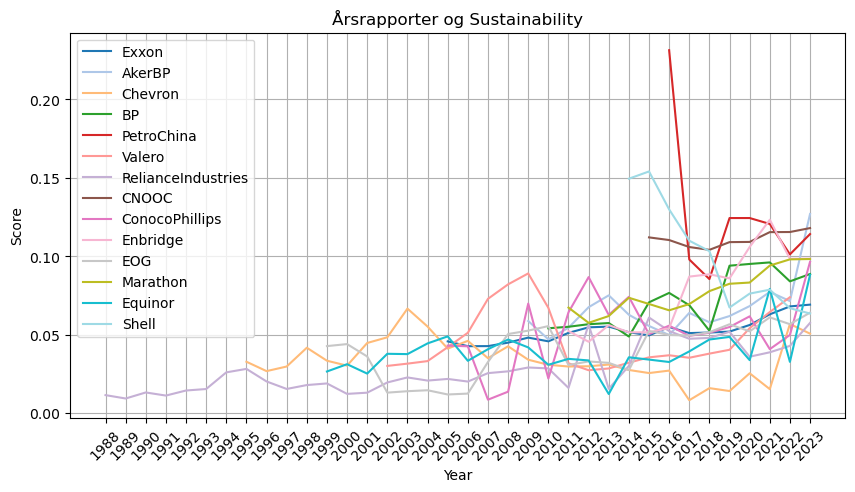

In [156]:
import matplotlib.cm as cm

# Combine all years into a single list and remove duplicates
all_years = sorted(set(year for company_years in years.values() for year in company_years))

# Define the colors and labels for each company
num_companies = len(plot_data)
colors = cm.tab20(np.linspace(0, 1, num_companies))
labels = list(plot_data.keys())

plt.figure(figsize=(10, 5))
plt.title('Årsrapporter og Sustainability')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, (company, color) in enumerate(zip(plot_data.keys(), colors)):
    plt.plot(years[company], plot_data[company], color=color, label=company)

# Customize x-axis ticks to show all years
plt.xticks(all_years, rotation=45)

# Show legend
plt.legend()

# Show the plot
plt.show()

In [157]:
import plotly.graph_objects as go

# Combine all years into a single list and remove duplicates
all_years = sorted(set(year for company_years in years.values() for year in company_years))

# Create a plotly figure
fig = go.Figure()

# Plot the scores for each company
for company in plot_data.keys():
    fig.add_trace(go.Scatter(
        x=years[company],
        y=plot_data[company],
        mode='lines+markers',
        name=company
    ))

# Customize the layout
fig.update_layout(
    title='Årsrapporter vs. Sustainability',
    xaxis_title='Year',
    yaxis_title='Score',
    xaxis=dict(tickmode='array', tickvals=all_years),
    yaxis=dict(tickmode='linear'),
    hovermode='x unified'
)

# Show the plot
fig.show()

## Snitter over alle årsrapportene!

In [63]:
company_list = [exxon_annual,akerBP_annual,chevron_annual,BP_annual,PetroChina_annual,Valero_annual,RelianceIndustries_annual,CNOOC_annual,conocophillips_annual,enbridge_annual,eog_resources_annual,marathon_annual,equinor_annual]
new_embeddings = {}

for year in range(1988,2024):
    new_embeddings[year] = []

# Collect embeddings for each year
for company in company_list:
    start_year = 2023 - len(company) + 1
    for index, embedding in enumerate(company):
        year = start_year + index
        if year in new_embeddings:
            new_embeddings[year].append(embedding)

# Calculate and store the mean of embeddings for each year
mean_embeddings = {}
for year, embeddings in new_embeddings.items():
    # Convert list of embeddings to a NumPy array for easier computation
    if embeddings:
        embedding_array = np.stack(embeddings)
        mean_embedding = np.mean(embedding_array, axis=0)
        mean_embeddings[year] = mean_embedding
    else:
        mean_embeddings[year] = np.array([])  # Handle years with no data

In [177]:
# Centroid: Ordet vi sammenlikner med
centroid = "sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [140]:
from scipy.spatial import distance as dist

def embedding_score(mean_embedding, centroid_embedding, alpha):
    mean_embedding = np.atleast_2d(mean_embedding)
    centroid_embedding = np.atleast_2d(centroid_embedding)
    distances = dist.cdist(mean_embedding, centroid_embedding, 'cosine').flatten()[0]
    score = 1 / (distances ** alpha) 

    return score

In [178]:
scores = {}
for year, embedding in mean_embeddings.items():
    scores[year] = embedding_score(embedding, centroid_embedding, alpha=1)

scores

ValueError: XA must be a 2-dimensional array.

[1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[2.5027277898048066, 2.425028039361643, 2.564119396072544, 2.4920263181546867, 2.67910627232823, 2.676781320600522, 2.939638971216788, 3.11446940184826, 2.9713364097669346, 2.888099751610227, 2.977803094059479, 2.9632352260767436, 2.975668448681645, 2.945929779777526, 3.3553044658794318, 3.35605887648346, 3.3067296856540365, 3.1932509597206633, 3.152574090174359, 3.1976535481874224, 3.29724264397685, 3.1211391517207536, 3.1501440361153934, 3.255631914072142, 3.2722182478725332, 3.2223819508815024, 3.168463559148117, 3.0929164873233215, 3.154252233539658, 3.210265111954199, 3.1821484529226103, 3.2515470317000554, 3.234057949693418, 3.337278742804137, 3.2247891991977893, 3.4293673175183836]


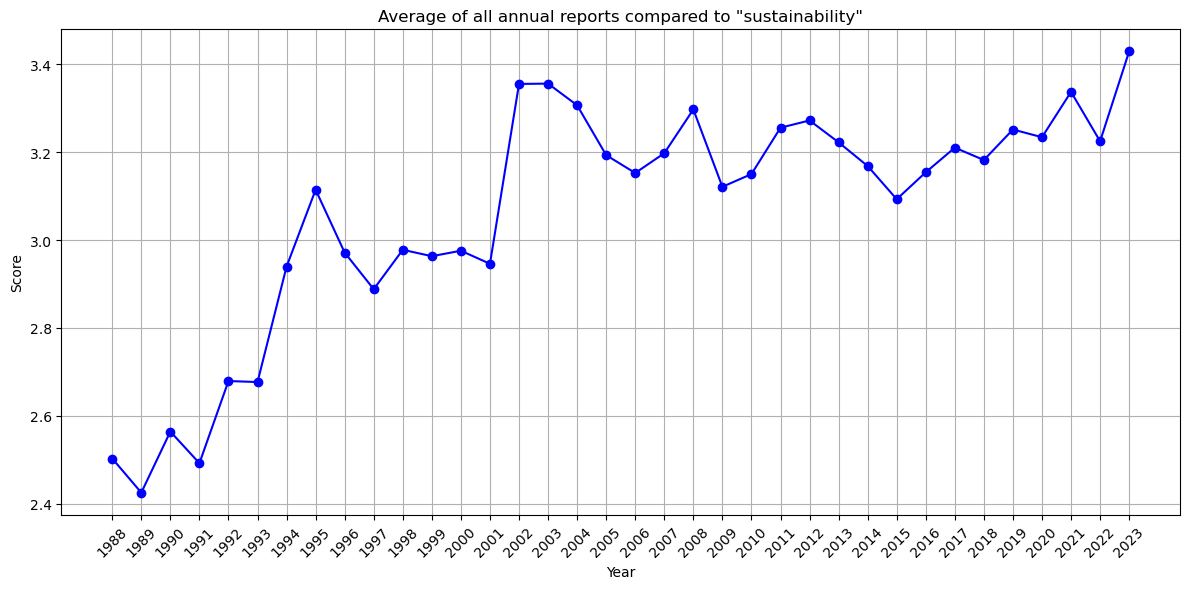

In [139]:
years = list(range(1988, 2024))
print(years)

score_values = []
for year in scores:
    score_values.append(scores[year])

print(score_values)

# Plot the scores
plt.figure(figsize=(12, 6))
plt.plot(years, score_values, marker='o', linestyle='-', color='blue')
plt.title(f'Average of all annual reports compared to "{centroid}"')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()  # Adjust layout to make room for label rotation

# Display the plot
plt.show()

## Nyhetsartikler

In [158]:
embeddings = {}
embeddings["Exxon"] = exxon_news
embeddings["AkerBP"] = akerBP_news
embeddings["Chevron"] = chevron_news
embeddings["BP"] = BP_news
embeddings["TotalEnergies"] = totalEnergies_news
embeddings["Equinor"] = equinor_news
# embeddings["PetroChina"] = PetroChina_news
# embeddings["Valero"] = Valero_news
# embeddings["RelianceIndustries"] = RelianceIndustries_news
# embeddings["CNOOC"] = CNOOC_news
# embeddings["ConocoPhillips"] = conocophillips_news
# embeddings["Enbridge"] = enbridge_news
# embeddings["EOG"] = eog_resources_news
# embeddings["Marathon"] = marathon_news

In [159]:
# Gir embeddingene en score basert på avstand til centroid-ordet

def embedding_score(mean_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(mean_embeddings, centroid_embedding, "cosine").flatten()
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

In [160]:
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

In [173]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [163]:
# Centroid: Ordet vi sammenlikner med
centroid = "At Our Company, we recognize the urgent need for climate action. As a leading player in the energy sector, we are committed to being part of the solution to global climate change. We understand the critical role we play and are taking decisive steps to reduce our carbon footprint and embrace renewable energy sources. Our dedication to cutting CO2 emissions is unwavering. We are actively investing in cutting-edge technologies and innovative practices to minimize our environmental impact. Our goal is to significantly reduce our greenhouse gas emissions in the coming years, contributing to a healthier planet for future generations. Transitioning to renewable energy is at the heart of our sustainability strategy. We are expanding our portfolio to include wind, solar, and other green energy sources, ensuring a diverse and sustainable energy mix. This transition not only supports global efforts to combat climate change but also positions Our Company as a leader in the new energy economy. We are thinking about the future and are committed to exploring all possibilities for a greener tomorrow. Our initiatives include enhancing energy efficiency, investing in research and development, and collaborating with stakeholders to create sustainable solutions. We believe that by working together, we can make a significant impact. At Our Company, our vision for the future is clear: a world where energy needs are met without compromising the health of our planet. We are dedicated to driving change, fostering innovation, and leading by example in the fight against climate change. Together, we can build a sustainable future. Join us on this journey towards a greener, more resilient world."
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2754,  0.8248, -0.9043,  ..., -0.7387, -0.2834, -0.2149]])

In [174]:
# Compute the scores for each company
alpha = 5
scores = {}
for company, emb_list in embeddings.items():
    scores[company] = embedding_score(emb_list, centroid_embedding, alpha).tolist()

scores

{'Exxon': [0.08601454772322395,
  0.08694591668600507,
  0.07867809629284847,
  0.08690697574380599,
  0.12986316733041997,
  0.15855330296978065,
  0.14128687984349922,
  0.11507474319514398,
  0.11667637021527263],
 'AkerBP': [0.06540684279312063,
  0.07286727968538637,
  0.0802741552074749,
  0.10604961113554337,
  0.08421334829557903,
  0.15398543373673143,
  0.13769194827731715,
  0.16887216146541686,
  0.1306392194034302],
 'Chevron': [0.06835393333336781,
  0.07907023123934323,
  0.06435927093787318,
  0.09843349676100227,
  0.15229681163452732,
  0.23487737882686546,
  0.16283610740260154,
  0.13977276986441908],
 'BP': [0.04150788669373451,
  0.06413426456530842,
  0.055193576399579204,
  0.07143801944232178,
  0.059828435830245254,
  0.0527135749513008,
  0.04968339802096846,
  0.04956161305732136,
  0.05561153015768236,
  0.09749446000508602,
  0.07952015398575557,
  0.10833010206013581,
  0.07939814648044256,
  0.07428954255738207,
  0.061295295792735814],
 'TotalEnergies':

In [166]:
# Define the years for each company
years = {
    'Exxon': list(range(2016, 2025)),
    'AkerBP': list(range(2016, 2025)),
    'Chevron': list(range(2017,2025)),
    'BP': list(range(2010,2025)),
    'TotalEnergies': list(range(2015,2025)),
    'Equinor': list(range(1998,2025))
    # 'PetroChina': list(range(2016,2024)),
    # 'Valero': list(range(2002,2023)),
    # 'RelianceIndustries': list(range(1988,2024)),
    # 'CNOOC': list(range(2015,2024)),
    # 'ConocoPhillips': list(range(2005,2024)),
    # 'Enbridge': list(range(2011,2024)),
    # 'EOG': list(range(1999,2024)),
    # 'Marathon': list(range(2011,2024))
}

# Prepare data for plotting
plot_data = {
    'Exxon': scores['Exxon'],
    'AkerBP': scores['AkerBP'],
    'Chevron': scores['Chevron'],
    'BP': scores['BP'],
    'TotalEnergies': scores['TotalEnergies'],
    'Equinor': scores['Equinor']
    # 'PetroChina': scores['PetroChina'],
    # 'Valero': scores['Valero'],
    # 'RelianceIndustries': scores['RelianceIndustries'],
    # 'CNOOC': scores['CNOOC'],
    # 'ConocoPhillips': scores['ConocoPhillips'],
    # 'Enbridge': scores['Enbridge'],
    # 'EOG': scores['EOG'],
    # 'Marathon': scores['Marathon']
}

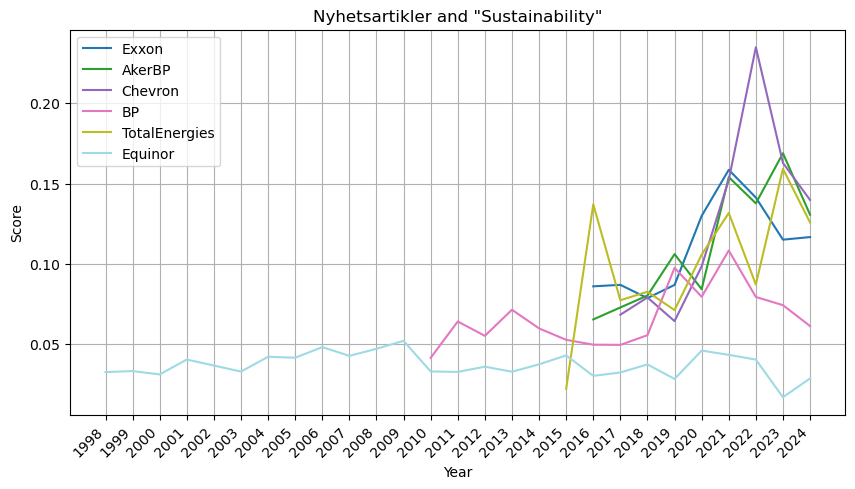

In [170]:
import matplotlib.cm as cm

# Combine all years into a single list and remove duplicates
all_years = sorted(set(year for company_years in years.values() for year in company_years))

# Define the colors and labels for each company
num_companies = len(plot_data)
colors = cm.tab20(np.linspace(0, 1, num_companies))
labels = list(plot_data.keys())

if len(centroid) > 30:
    title = centroid[:31]
else:
    title = centroid

plt.figure(figsize=(10, 5))
plt.title(f'Nyhetsartikler and "{title}"')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, (company, color) in enumerate(zip(plot_data.keys(), colors)):
    plt.plot(years[company], plot_data[company], color=color, label=company)

# Customize x-axis ticks to show all years
plt.xticks(all_years, rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [72]:
import plotly.graph_objects as go

# Combine all years into a single list and remove duplicates
all_years = sorted(set(year for company_years in years.values() for year in company_years))

# Create a plotly figure
fig = go.Figure()

# Plot the scores for each company
for company in plot_data.keys():
    fig.add_trace(go.Scatter(
        x=years[company],
        y=plot_data[company],
        mode='lines+markers',
        name=company
    ))

if len(centroid) > 30:
    title = centroid[:31]
else:
    title = centroid

# Customize the layout
fig.update_layout(
    title=f'Nyhetsartikler vs. {title}',
    xaxis_title='Year',
    yaxis_title='Score',
    xaxis=dict(tickmode='array', tickvals=all_years),
    yaxis=dict(tickmode='linear'),
    hovermode='x unified'
)

# Show the plot
fig.show()

## Plotting

In [ ]:
## Initialization:

embeddings = {}
years = {}
plot_data = {}

def embedding_score(mean_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(mean_embeddings, centroid_embedding, "cosine").flatten()
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

# Centroid: Ordet vi sammenlikner med
centroid = "At Our Company, we recognize the urgent need for climate action. As a leading player in the energy sector, we are committed to being part of the solution to global climate change. We understand the critical role we play and are taking decisive steps to reduce our carbon footprint and embrace renewable energy sources. Our dedication to cutting CO2 emissions is unwavering. We are actively investing in cutting-edge technologies and innovative practices to minimize our environmental impact. Our goal is to significantly reduce our greenhouse gas emissions in the coming years, contributing to a healthier planet for future generations. Transitioning to renewable energy is at the heart of our sustainability strategy. We are expanding our portfolio to include wind, solar, and other green energy sources, ensuring a diverse and sustainable energy mix. This transition not only supports global efforts to combat climate change but also positions Our Company as a leader in the new energy economy. We are thinking about the future and are committed to exploring all possibilities for a greener tomorrow. Our initiatives include enhancing energy efficiency, investing in research and development, and collaborating with stakeholders to create sustainable solutions. We believe that by working together, we can make a significant impact. At Our Company, our vision for the future is clear: a world where energy needs are met without compromising the health of our planet. We are dedicated to driving change, fostering innovation, and leading by example in the fight against climate change. Together, we can build a sustainable future. Join us on this journey towards a greener, more resilient world."
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

# Compute the scores for each company
def compute_scores():
    alpha = 5
    scores = {}
    for company, emb_list in embeddings.items():
        scores[company] = embedding_score(emb_list, centroid_embedding, alpha).tolist()
    return scores


In [ ]:
def add_to_plot(company_name, embedding, start_year, end_year):
    embeddings[company_name] = embedding
    years[company_name] = list(range(start_year,end_year+1))
    scores = compute_scores()
    plot_data[company_name] = scores[company_name]

## Andre sammenlikninger

In [191]:
scores  ## Årsrapporter

{'Exxon': [0.0458503238982617,
  0.04279822279476644,
  0.042839869288355065,
  0.04505624797755934,
  0.048261948220970886,
  0.0458908164675468,
  0.05128385627430831,
  0.054799165886927015,
  0.05525602058135024,
  0.0517101844044448,
  0.04969078106362861,
  0.05504071456569372,
  0.05114098748539195,
  0.051494915891200005,
  0.05208977735727358,
  0.05630091326134962,
  0.06310207764675013,
  0.06812724674300272,
  0.06926593019121904],
 'AkerBP': [0.05883655194549598,
  0.04715300784942902,
  0.054520963847942416,
  0.0676256727463997,
  0.07519290924712868,
  0.06281376814922622,
  0.05567894617540647,
  0.04989467249825375,
  0.06399744762345069,
  0.058029625132919996,
  0.061982316616699396,
  0.06834825061818761,
  0.0773676074639296,
  0.07153668660619726,
  0.12702157347933327],
 'Chevron': [0.03289249569555908,
  0.026910917894697912,
  0.029841238805429444,
  0.041806762215937175,
  0.0335416731544095,
  0.030399289020682705,
  0.04483187252073501,
  0.0484703584115711

In [196]:
scores2 = []

for company in scores:
    scores2.append(scores[company][-1])

scores2

[0.06926593019121904,
 0.12702157347933327,
 0.050776158650527564,
 0.08878749565562677,
 0.11423162402304628,
 0.073999906126488,
 0.057616518838167714,
 0.1180403189953057,
 0.09656762731829581,
 0.09854480603656611,
 0.06415844434860062,
 0.09833307817583913,
 0.08831254216888633,
 0.06359658941216743]

In [193]:
scores.keys()

dict_keys(['Exxon', 'AkerBP', 'Chevron', 'BP', 'PetroChina', 'Valero', 'RelianceIndustries', 'CNOOC', 'ConocoPhillips', 'Enbridge', 'EOG', 'Marathon', 'Equinor', 'Shell'])

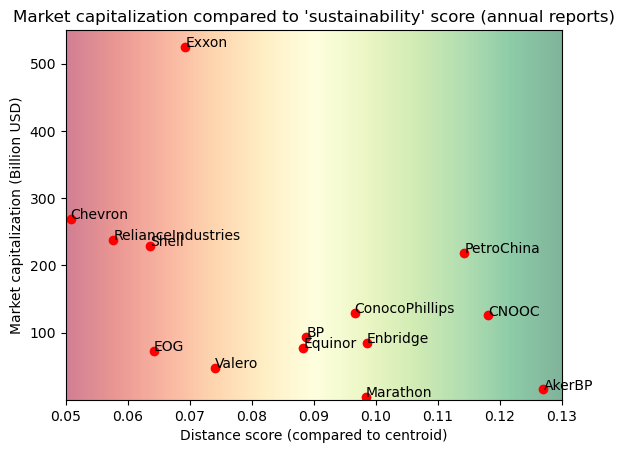

In [207]:

## Nyhetsartikler

fig, ax = plt.subplots()

labels = ['Exxon', 'AkerBP', 'Chevron', 'BP', 'PetroChina', 'Valero', 'RelianceIndustries', 'CNOOC', 'ConocoPhillips', 'Enbridge', 'EOG', 'Marathon', 'Equinor', 'Shell']

# Define the gradient
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient background directly on the axes
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('RdYlGn'), alpha=0.5, extent=[0, 1, 0, 1], transform=ax.transAxes)

# Customize the plot
plt.xlim(0.05,0.13)
plt.ylim(0.2, 550)

ax.set_facecolor('none')

# Plot the data
plt.plot(scores2,[525.03,15.51,269.34,93.82,218.35,48.00,238.42,125.72,129.11,84.28,72.81,4.77,76.79,228.68],"ro")

for i, label in enumerate(labels):
    plt.text(scores2[i], [525.03,15.51,269.34,93.82,218.35,48.00,238.42,125.72,129.11,84.28,72.81,4.77,76.79,228.68][i], label, fontsize=10, ha='left')

plt.xlabel("Distance score (compared to centroid)")
plt.ylabel("Market capitalization (Billion USD)")
plt.title("Market capitalization compared to 'sustainability' score (annual reports)")


plt.show()